In [8]:
import os

os.nice(1)
import geopandas as gpd
import pandas as pd
from numpy import mean
from sklearn.inspection import permutation_importance
from numpy import std
from matplotlib import pyplot
import numpy as np
from sklearn.metrics import confusion_matrix

import matplotlib.pylab as plt
import mock
import dill

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix

import seaborn as sn


In [9]:
points1 = '/mnt/eo/projekt/2021_STATeo/01_Data/02_labelled_prepared/Punkte_stat2austria/eckartsau_dgm_S1.gpkg' 

points1 = gpd.read_file(points1)
points1 = pd.DataFrame(points1.drop(columns='geometry'))


points2 = '/mnt/eo/projekt/2021_STATeo/01_Data/02_labelled_prepared/Punkte_stat2austria/Friesach_dgm_S1.gpkg' 

points2 = gpd.read_file(points2)
points2 = pd.DataFrame(points2.drop(columns='geometry'))


points3 = '/mnt/eo/projekt/2021_STATeo/01_Data/02_labelled_prepared/Punkte_stat2austria/Mattsee_dgm_S1.gpkg' 

points3 = gpd.read_file(points3)
points3 = pd.DataFrame(points3.drop(columns='geometry'))


points4 = '/mnt/eo/projekt/2021_STATeo/01_Data/02_labelled_prepared/Punkte_stat2austria/Mieming_dgm_S1.gpkg' 

points4 = gpd.read_file(points4)
points4 = pd.DataFrame(points4.drop(columns='geometry'))


points5 = '/mnt/eo/projekt/2021_STATeo/01_Data/02_labelled_prepared/Punkte_stat2austria/Ternitz_dgm_S1.gpkg' 

points5 = gpd.read_file(points5)
points5 = pd.DataFrame(points5.drop(columns='geometry'))


points6 = '/mnt/eo/projekt/2021_STATeo/01_Data/02_labelled_prepared/Punkte_stat2austria/Tobaj_dgm_S1.gpkg' 

points6 = gpd.read_file(points6)
points6 = pd.DataFrame(points6.drop(columns='geometry'))


points7 = '/mnt/eo/projekt/2021_STATeo/01_Data/02_labelled_prepared/Punkte_stat2austria/Villach_dgm_S1.gpkg' 

points7 = gpd.read_file(points7)
points7 = pd.DataFrame(points7.drop(columns='geometry'))


points8 = '/mnt/eo/projekt/2021_STATeo/01_Data/02_labelled_prepared/Punkte_stat2austria/Weitra_dgm_S1.gpkg' 

points8 = gpd.read_file(points8)
points8 = pd.DataFrame(points8.drop(columns='geometry'))


points9 = '/mnt/eo/projekt/2021_STATeo/01_Data/02_labelled_prepared/Punkte_stat2austria/sportplaetze_dgm_S1.gpkg' 

points9 = gpd.read_file(points9)
points9 = pd.DataFrame(points9.drop(columns='geometry'))


points10 = '/mnt/eo/projekt/2021_STATeo/01_Data/02_labelled_prepared/Punkte_stat2austria/gletscher_data_dgm_S1.gpkg' 

points10 = gpd.read_file(points10)
points10 = pd.DataFrame(points10.drop(columns='geometry'))

points11 = '/mnt/eo/projekt/2021_STATeo/01_Data/02_labelled_prepared/Punkte_stat2austria/neusiedler_see_dgm_S1.gpkg' 

points11 = gpd.read_file(points11)
points11 = pd.DataFrame(points11.drop(columns='geometry'))



In [10]:
df = pd.concat([points1, points2, points3, points4, points5, points5, points6, points7, points8, points9, points10, points11])
df = df.fillna(np.nan)
#df = df.drop(['Index'], axis = 1)

In [11]:
df['Response'] = df['Response'].replace('bare rock and screes', 'Bare rock and screes')

In [12]:
df = df.drop(columns=['SLOPE'])

In [13]:
df

,Response,B02_2019.03.03,B02_2019.03.18,B02_2019.04.02,B02_2019.04.17,B02_2019.05.02,B02_2019.05.17,B02_2019.06.01,B02_2019.06.16,B02_2019.07.01,...,S1_VH_3,S1_VH_4,S1_VH_5,S1_VH_6,S1_VH_7,S1_VH_8,S1_VH_9,S1_VH_10,S1_VH_11,S1_VH_12
0,Cropland,1902.0,828.0,360.0,290.0,314.0,2224.0,316.0,466.0,NaN,...,-2274.817383,-1993.690186,-2022.596191,-2069.654541,-2323.224365,-2170.135010,-2234.125000,-2265.883545,-1796.835083,-1813.641602
1,Cropland,1320.0,1288.0,1202.0,1156.0,1354.0,NaN,1268.0,480.0,532.0,...,-2411.384521,-2278.277344,-1832.166626,-1481.499878,-1397.056274,-1309.455811,-1499.372070,-1766.141479,-2005.459106,-2099.725342
2,Grünland,1094.0,955.0,595.0,508.0,437.0,NaN,387.0,422.0,567.0,...,-1759.184692,-1772.588257,-1781.685791,-1688.267700,-1833.933960,-1845.986328,-1944.586792,-1792.766724,-1722.071045,-1732.518311
3,Cropland,NaN,1428.0,1072.0,1088.0,1064.0,NaN,1224.0,461.0,624.0,...,-2360.052490,-2468.378418,-1956.960938,-1464.479858,-1539.760132,-1512.455688,-1486.889404,-1738.083008,-1813.321533,-1789.538086
4,Cropland,622.0,635.0,324.0,230.0,283.0,NaN,294.0,380.0,994.0,...,-2036.415527,-2063.750000,-2145.584229,-2066.315430,-2088.901855,-2057.752197,-2113.814209,-1724.787476,-1558.609253,-1644.402832
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13,Feuchtgebiete,391.0,NaN,NaN,403.0,NaN,NaN,413.0,346.0,452.0,...,-1768.725586,-1677.290405,-1725.979370,-1633.764038,-1850.290771,-1931.119507,-1815.434326,-2016.197754,-1783.492310,-1937.074951
14,Feuchtgebiete,563.0,515.0,545.0,457.0,522.0,491.0,469.0,449.0,588.0,...,-2069.850098,-2014.027344,-1940.582764,-1877.552124,-1994.137451,-1878.373413,-1908.563721,-2019.579712,-1894.427002,-2055.068604
15,Feuchtgebiete,NaN,NaN,NaN,NaN,NaN,NaN,NaN,311.0,NaN,...,-1860.691650,-1798.073486,-1848.284912,-1757.738647,-1812.486328,-1913.527222,-1820.539062,-1918.162842,-1880.084106,-2052.979736
16,Feuchtgebiete,NaN,NaN,990.0,NaN,NaN,NaN,NaN,274.0,NaN,...,-1996.103394,-1989.113525,-1927.432617,-1744.583374,-1636.946533,-1687.101196,-1694.705933,-1705.878906,-1734.795288,-1980.680786


In [14]:
cols = list(df.columns)
cols = cols[1:192]
df[cols] = df[cols].fillna(0).astype(int)
df.replace(0, np.nan, inplace = True)

In [15]:
data = df
target = 'Response'
response = df['Response']
data = df.iloc[:, 1:(len(data.columns))]
X = data
y = response


In [16]:
def display(results):
    print(f'Best parameters are: {results.best_params_}')
    print("\n")
    mean_score = results.cv_results_['mean_test_score']
    std_score = results.cv_results_['std_test_score']
    params = results.cv_results_['params']
    for mean, std, params in zip(mean_score,std_score,params):
        print(f'{round(mean,3)} +/-{round(std,3)} for the {params}')

In [4]:
#n_scores = cross_val_score(model, y = response, X = data, scoring='f1', cv=cv, n_jobs=-1)

/home/nnors/.conda/envs/testenv/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/nnors/.conda/envs/testenv/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/nnors/.conda/envs/testenv/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 103, in __call__
    score = scorer._score(cached_call, estimator, *args, **kwargs)
  File "/home/nnors/.conda/envs/testenv/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 264, in _score
    return self._sign * self._score_func(y_true, y_pred, **self._kwargs)
  File "/home/nnors/.conda/envs/testenv/lib/python3.9/site-packages/sklearn/metrics/_classification.py", line 1123, in f1_score
    return fbeta_score(
  File "/home/nnors/.conda/envs/testen

KeyboardInterrupt: 

In [17]:
import sklearn
# for work with missing data neccessary
with mock.patch("sklearn.utils.validation._assert_all_finite"):
    from sklearn.ensemble import HistGradientBoostingClassifier
    from sklearn.model_selection import cross_val_score
    from sklearn.model_selection import RepeatedStratifiedKFold
    from sklearn.model_selection import GridSearchCV
    
    model = HistGradientBoostingClassifier(max_bins=255, max_iter=50)
    cv = RepeatedStratifiedKFold(n_splits = 5, n_repeats = 10)

    print(model.get_params().keys())

 
    parameters = {
        "max_depth":[5,7,9, 11, 13, 15],
        "learning_rate":[0.1, 0.2, 0.3]
    }

    gsv = GridSearchCV(model, parameters,cv=cv)
    gsv.fit(data, response.values.ravel())
    

    n_scores = cross_val_score(model, y = response, X = data, scoring='balanced_accuracy', cv=cv, n_jobs=-1)
    
    print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

dict_keys(['categorical_features', 'early_stopping', 'l2_regularization', 'learning_rate', 'loss', 'max_bins', 'max_depth', 'max_iter', 'max_leaf_nodes', 'min_samples_leaf', 'monotonic_cst', 'n_iter_no_change', 'random_state', 'scoring', 'tol', 'validation_fraction', 'verbose', 'warm_start'])
Accuracy: 0.798 (0.008)


In [18]:
display(gsv)
list_params = gsv.best_params_
results = pd.DataFrame(gsv.cv_results_)

learner_rate, max_dpth = list(list_params.values())


Best parameters are: {'learning_rate': 0.1, 'max_depth': 15}


0.828 +/-0.005 for the {'learning_rate': 0.1, 'max_depth': 5}
0.842 +/-0.005 for the {'learning_rate': 0.1, 'max_depth': 7}
0.846 +/-0.005 for the {'learning_rate': 0.1, 'max_depth': 9}
0.847 +/-0.006 for the {'learning_rate': 0.1, 'max_depth': 11}
0.847 +/-0.006 for the {'learning_rate': 0.1, 'max_depth': 13}
0.848 +/-0.006 for the {'learning_rate': 0.1, 'max_depth': 15}
0.811 +/-0.022 for the {'learning_rate': 0.2, 'max_depth': 5}
0.81 +/-0.023 for the {'learning_rate': 0.2, 'max_depth': 7}
0.815 +/-0.02 for the {'learning_rate': 0.2, 'max_depth': 9}
0.812 +/-0.019 for the {'learning_rate': 0.2, 'max_depth': 11}
0.813 +/-0.022 for the {'learning_rate': 0.2, 'max_depth': 13}
0.809 +/-0.023 for the {'learning_rate': 0.2, 'max_depth': 15}
0.778 +/-0.012 for the {'learning_rate': 0.3, 'max_depth': 5}
0.777 +/-0.011 for the {'learning_rate': 0.3, 'max_depth': 7}
0.767 +/-0.011 for the {'learning_rate': 0.3, 'max_depth': 9}
0.7

In [19]:
parameters = {
      "max_depth":[max_dpth-2 ,max_dpth-1, max_dpth, max_dpth+1, max_dpth+2],
      "learning_rate":[learner_rate*(1/2), learner_rate * (1/3), learner_rate, learner_rate*2, learner_rate*3]
  }

gsv = GridSearchCV(model, parameters,cv=cv)
gsv.fit(data, response.values.ravel())
    

n_scores = cross_val_score(model, y = response, X = data, scoring='balanced_accuracy', cv=cv, n_jobs=-1)
    
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

display(gsv)
list_params_1 = gsv.best_params_
results = pd.DataFrame(gsv.cv_results_)

learner_rate, max_dpth = list(list_params_1.values())

Accuracy: 0.799 (0.007)
Best parameters are: {'learning_rate': 0.1, 'max_depth': 16}


0.831 +/-0.006 for the {'learning_rate': 0.05, 'max_depth': 13}
0.831 +/-0.006 for the {'learning_rate': 0.05, 'max_depth': 14}
0.831 +/-0.005 for the {'learning_rate': 0.05, 'max_depth': 15}
0.831 +/-0.005 for the {'learning_rate': 0.05, 'max_depth': 16}
0.831 +/-0.006 for the {'learning_rate': 0.05, 'max_depth': 17}
0.819 +/-0.006 for the {'learning_rate': 0.03333333333333333, 'max_depth': 13}
0.818 +/-0.006 for the {'learning_rate': 0.03333333333333333, 'max_depth': 14}
0.819 +/-0.005 for the {'learning_rate': 0.03333333333333333, 'max_depth': 15}
0.82 +/-0.007 for the {'learning_rate': 0.03333333333333333, 'max_depth': 16}
0.818 +/-0.006 for the {'learning_rate': 0.03333333333333333, 'max_depth': 17}
0.847 +/-0.006 for the {'learning_rate': 0.1, 'max_depth': 13}
0.847 +/-0.006 for the {'learning_rate': 0.1, 'max_depth': 14}
0.847 +/-0.005 for the {'learning_rate': 0.1, 'max_depth': 15}
0.848 +/-0

In [20]:
parameters = {
    "max_bins":[5, 50, 150, 255],
    "max_iter":[3,30, 50, 100, 150, 200],
    "max_depth":[max_dpth],
    "learning_rate":[learner_rate]
    }

gsv = GridSearchCV(model, parameters,cv=cv)
gsv.fit(data, response.values.ravel())
    

n_scores = cross_val_score(model, y = response, X = data, scoring='balanced_accuracy', cv=cv, n_jobs=-1)
    
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

display(gsv)
list_params_2 = gsv.best_params_
results = pd.DataFrame(gsv.cv_results_)

help1, mx_bins, help2, mx_iter = list(list_params_2.values())

Accuracy: 0.799 (0.008)
Best parameters are: {'learning_rate': 0.1, 'max_bins': 150, 'max_depth': 16, 'max_iter': 100}


0.703 +/-0.006 for the {'learning_rate': 0.1, 'max_bins': 5, 'max_depth': 16, 'max_iter': 3}
0.82 +/-0.006 for the {'learning_rate': 0.1, 'max_bins': 5, 'max_depth': 16, 'max_iter': 30}
0.835 +/-0.006 for the {'learning_rate': 0.1, 'max_bins': 5, 'max_depth': 16, 'max_iter': 50}
0.846 +/-0.006 for the {'learning_rate': 0.1, 'max_bins': 5, 'max_depth': 16, 'max_iter': 100}
0.846 +/-0.006 for the {'learning_rate': 0.1, 'max_bins': 5, 'max_depth': 16, 'max_iter': 150}
0.845 +/-0.006 for the {'learning_rate': 0.1, 'max_bins': 5, 'max_depth': 16, 'max_iter': 200}
0.715 +/-0.007 for the {'learning_rate': 0.1, 'max_bins': 50, 'max_depth': 16, 'max_iter': 3}
0.833 +/-0.006 for the {'learning_rate': 0.1, 'max_bins': 50, 'max_depth': 16, 'max_iter': 30}
0.847 +/-0.006 for the {'learning_rate': 0.1, 'max_bins': 50, 'max_depth': 16, 'max_iter': 50}
0.853 +/-0.006 for the {'learn

In [21]:
# max bins maximum value = 255
parameters = {
    "max_bins":[mx_bins-4, mx_bins, mx_bins+5],
    "max_iter":[mx_iter-20, mx_iter-10, mx_iter, mx_iter+10, mx_iter+20],
    "max_depth":[max_dpth],
    "learning_rate":[learner_rate]
    }

gsv = GridSearchCV(model, parameters,cv=cv)
gsv.fit(data, response.values.ravel())
    

n_scores = cross_val_score(model, y = response, X = data, scoring='balanced_accuracy', cv=cv, n_jobs=-1)
    
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

display(gsv)
list_params_3 = gsv.best_params_
results = pd.DataFrame(gsv.cv_results_)

help1, mx_bins, help2, mx_iter = list(list_params_3.values())

Accuracy: 0.798 (0.010)
Best parameters are: {'learning_rate': 0.1, 'max_bins': 146, 'max_depth': 16, 'max_iter': 110}


0.853 +/-0.004 for the {'learning_rate': 0.1, 'max_bins': 146, 'max_depth': 16, 'max_iter': 80}
0.853 +/-0.005 for the {'learning_rate': 0.1, 'max_bins': 146, 'max_depth': 16, 'max_iter': 90}
0.853 +/-0.005 for the {'learning_rate': 0.1, 'max_bins': 146, 'max_depth': 16, 'max_iter': 100}
0.854 +/-0.005 for the {'learning_rate': 0.1, 'max_bins': 146, 'max_depth': 16, 'max_iter': 110}
0.853 +/-0.006 for the {'learning_rate': 0.1, 'max_bins': 146, 'max_depth': 16, 'max_iter': 120}
0.853 +/-0.006 for the {'learning_rate': 0.1, 'max_bins': 150, 'max_depth': 16, 'max_iter': 80}
0.852 +/-0.005 for the {'learning_rate': 0.1, 'max_bins': 150, 'max_depth': 16, 'max_iter': 90}
0.853 +/-0.005 for the {'learning_rate': 0.1, 'max_bins': 150, 'max_depth': 16, 'max_iter': 100}
0.853 +/-0.005 for the {'learning_rate': 0.1, 'max_bins': 150, 'max_depth': 16, 'max_iter': 110}
0.853 +/-0

In [22]:
parameters = {
    "max_bins":[mx_bins],
    "max_iter":[mx_iter],
    "max_depth":[max_dpth],
    "learning_rate":[learner_rate],
    "l2_regularization":[0,1,10,100]

    }

gsv = GridSearchCV(model, parameters,cv=cv)
gsv.fit(data, response.values.ravel())
    

n_scores = cross_val_score(model, y = response, X = data, scoring='balanced_accuracy', cv=cv, n_jobs=-1)
    
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

display(gsv)
list_params_4 = gsv.best_params_
results = pd.DataFrame(gsv.cv_results_)

regularization, help1, help2, help3, help4 = list(list_params_4.values())

Accuracy: 0.798 (0.010)
Best parameters are: {'l2_regularization': 1, 'learning_rate': 0.1, 'max_bins': 146, 'max_depth': 16, 'max_iter': 110}


0.853 +/-0.006 for the {'l2_regularization': 0, 'learning_rate': 0.1, 'max_bins': 146, 'max_depth': 16, 'max_iter': 110}
0.855 +/-0.006 for the {'l2_regularization': 1, 'learning_rate': 0.1, 'max_bins': 146, 'max_depth': 16, 'max_iter': 110}
0.853 +/-0.006 for the {'l2_regularization': 10, 'learning_rate': 0.1, 'max_bins': 146, 'max_depth': 16, 'max_iter': 110}
0.827 +/-0.005 for the {'l2_regularization': 100, 'learning_rate': 0.1, 'max_bins': 146, 'max_depth': 16, 'max_iter': 110}


In [23]:
# check if regularization is 0
parameters = {
    "max_bins":[mx_bins],
    "max_iter":[mx_iter],
    "max_depth":[max_dpth],
    "learning_rate":[learner_rate],
    #"l2_regularization":[regularization*(1/3),regularization*(1/2), regularization, regularization*2, regularization*3]
    "l2_regularization":[0.75,regularization, 5, 10, 12]

    }

gsv = GridSearchCV(model, parameters,cv=cv)
gsv.fit(data, response.values.ravel())
    

n_scores = cross_val_score(model, y = response, X = data, scoring='balanced_accuracy', cv=cv, n_jobs=-1)
    
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

display(gsv)
list_params_5 = gsv.best_params_
results = pd.DataFrame(gsv.cv_results_)

regularization, help1, help2, help3, help4 = list(list_params_5.values())

Accuracy: 0.799 (0.009)
Best parameters are: {'l2_regularization': 1, 'learning_rate': 0.1, 'max_bins': 146, 'max_depth': 16, 'max_iter': 110}


0.855 +/-0.005 for the {'l2_regularization': 0.75, 'learning_rate': 0.1, 'max_bins': 146, 'max_depth': 16, 'max_iter': 110}
0.856 +/-0.005 for the {'l2_regularization': 1, 'learning_rate': 0.1, 'max_bins': 146, 'max_depth': 16, 'max_iter': 110}
0.855 +/-0.005 for the {'l2_regularization': 5, 'learning_rate': 0.1, 'max_bins': 146, 'max_depth': 16, 'max_iter': 110}
0.853 +/-0.006 for the {'l2_regularization': 10, 'learning_rate': 0.1, 'max_bins': 146, 'max_depth': 16, 'max_iter': 110}
0.852 +/-0.005 for the {'l2_regularization': 12, 'learning_rate': 0.1, 'max_bins': 146, 'max_depth': 16, 'max_iter': 110}


In [24]:
final_model = HistGradientBoostingClassifier(max_depth = max_dpth, learning_rate = learner_rate,
 max_bins = mx_bins, max_iter = mx_iter, l2_regularization = regularization)
fit = final_model.fit(X, y)

#pp = final_model.predict_proba(X)

#fit.feature_names_in_
print(fit.score(X,y))

regularization

#models = final_model().fit(X,y)

0.987732232379829


1

In [25]:
y_true = y
labels = final_model.classes_
from sklearn.model_selection import cross_val_predict
y_pred = final_model.predict(X)
cr = cross_val_predict(final_model, X, y_true, cv=3)



conf = confusion_matrix(y_true=y_true, y_pred=cr, labels=labels)
#conf
y_pred
cm = pd.DataFrame(conf, index=labels, columns = labels)
print(cm)




                         Bare rock and screes  Cropland  Feuchtgebiete  \
Bare rock and screes                       54        77              0   
Cropland                                   14      1161              6   
Feuchtgebiete                               3         6             98   
Gletscher                                  11         0              0   
Grünland                                  173        44             26   
Heathland and shrubs                       33        25              8   
Urban                                       9        61              5   
Wasser                                     10        28             28   
Wälder                                     22        13             46   
sparsely vegetated land                    18        33              0   

                         Gletscher  Grünland  Heathland and shrubs  Urban  \
Bare rock and screes            54       320                    39     57   
Cropland                       

In [26]:
conf = confusion_matrix(y_true=y_true, y_pred=cr, labels=labels)
#conf
y_pred
cm = pd.DataFrame(conf, index=labels, columns = labels)

# normalized confusion matrix
cmn = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
print(cmn)

                         Bare rock and screes  Cropland  Feuchtgebiete  \
Bare rock and screes                 0.081081  0.115616       0.000000   
Cropland                             0.008274  0.686170       0.003546   
Feuchtgebiete                        0.004071  0.008141       0.132972   
Gletscher                            0.050691  0.000000       0.000000   
Grünland                             0.071695  0.018235       0.010775   
Heathland and shrubs                 0.031549  0.023901       0.007648   
Urban                                0.003463  0.023471       0.001924   
Wasser                               0.007215  0.020202       0.020202   
Wälder                               0.003960  0.002340       0.008279   
sparsely vegetated land              0.027994  0.051322       0.000000   

                         Gletscher  Grünland  Heathland and shrubs     Urban  \
Bare rock and screes      0.081081  0.480480              0.058559  0.085586   
Cropland                 

/tmp/ipykernel_3201593/2111671548.py:7: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  cmn = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


Text(0.5, 1.0, 'Österreich')

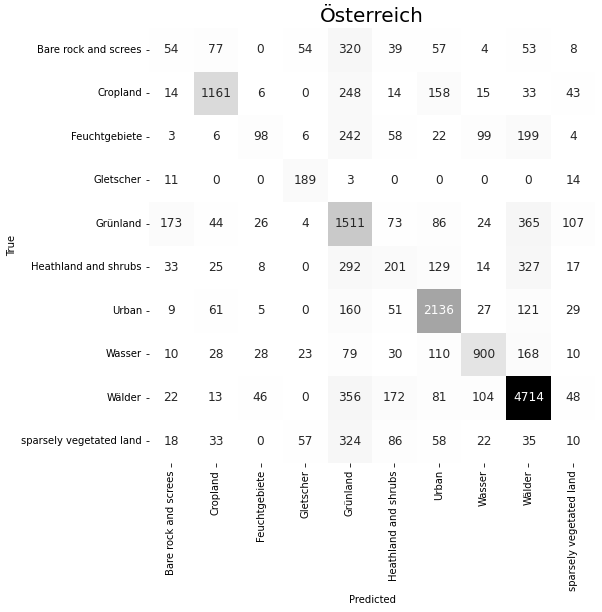

In [27]:


fig, ax = plt.subplots(figsize=(8,8))
sn.set(font_scale = 1.01)
s = sn.heatmap(cm, annot=True, cbar = False,  cmap='Greys', fmt='.0f' )
s.set(xlabel='Predicted', ylabel='True')
s.set_title("Österreich", fontsize = 20)


#s.figure.savefig("confusionmatrix_relativ_Österreich2.png", bbox_inches = 'tight')

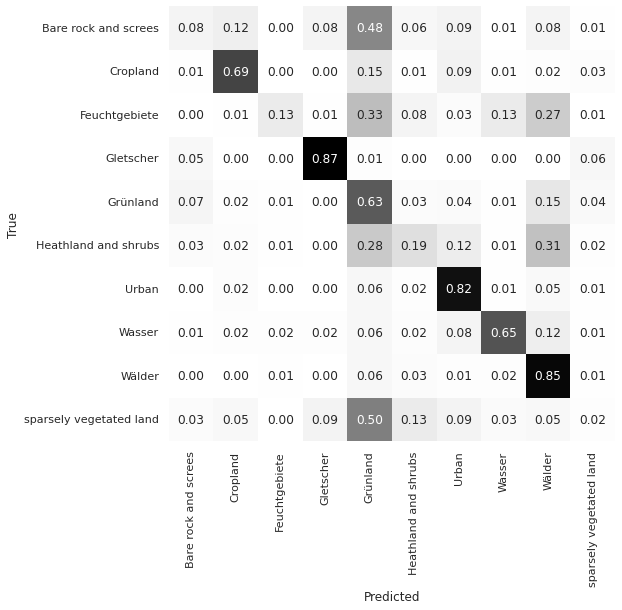

In [28]:
fig, ax = plt.subplots(figsize=(8,8))
sn.set(font_scale = 1.01)

s = sn.heatmap(cmn, annot=True, cbar = False,  cmap='Greys', fmt='.2f' )
s.set(xlabel='Predicted', ylabel='True')
#s.set_title("Austria", fontsize = 20)


s.figure.savefig("confusionmatrix_relativ_Österreich2.png", bbox_inches = 'tight')

In [29]:
# nested crossvalidation
inner_cv = RepeatedStratifiedKFold(n_splits = 5, n_repeats = 1)
outer_cv = RepeatedStratifiedKFold(n_splits = 3, n_repeats = 3)

clf = GridSearchCV(estimator=model, param_grid=parameters, cv=inner_cv)
nested_score = cross_val_score(clf, y = response, X = data, cv = outer_cv, n_jobs=-1, scoring = 'balanced_accuracy')



print('Accuracy: %.3f (%.3f)' % (mean(nested_score), std(nested_score)))

Accuracy: 0.793 (0.010)


In [30]:
print('Accuracy: %.3f (%.3f)' % (mean(nested_score), std(nested_score)))

Accuracy: 0.793 (0.010)


In [32]:
path = '/mnt/eo/projekt/2021_STATeo/01_Data/Österreich/Model/'

dill.dump_session(path+'Model_Oesterreich5.db')


In [3]:
dill.load_session('/mnt/eo/projekt/2021_STATeo/01_Data/Österreich/Model/Model_Oesterreich5balan.db')